## Developing an Accurate Predictive Model to Forecast Coronary Heart Disease

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
heart = pd.read_csv('/Users/pandem/Downloads/cardiovascular_2.txt',sep=';',decimal=',')
heart.head() #displays the first five rows of the dataframe

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
len(heart) #returns length of an object

462

In [4]:
heart=heart.drop('ind',1)
heart['famhist'] = heart['famhist'].map({'Present': 1, 'Absent': 0})


/var/folders/qm/8v2xsbws7csbw9bfqpf33lk00000gn/T/ipykernel_46525/2597727344.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  heart=heart.drop('ind',1)


In [5]:
heart.head() #displays the first five rows of the dataframe


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [6]:
# Convert dtypes to numeric
heart[['tobacco','ldl','adiposity','obesity','alcohol']] = heart[['tobacco','ldl','adiposity','obesity','alcohol']].apply(pd.to_numeric)

In [7]:
# Check for null values
heart.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
heart.info() #prints the information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


### Data Description
The data used in this analysis is extracted from kaggle.com and contains 462 observations on the following 10 varibles:

1. sbp - systolic blood pressure
2. tobacco - cumulative tobacco (in kgs)
3. ldl - low density lipoprotein cholesterol
4. adiposity - numeric
5. famhist - family history of heart disease
6. typea - type A behavior
7. obesity
8. alcohol - current alcohol consumption
9. age
10. chd - response, coronary heart disease(1 if present, 0 if absent)

### Objective
The objective of this analysis is to apply data mining and machine learning techniques to analyze  the determinants of heart disease and to build a predictive model to predict heart disease.

### Summary Statistics

In [9]:
heart.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


### Correlation Analysis

In [10]:
heart.corr() #Calculating the correlations between variables


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


### Data Visualization

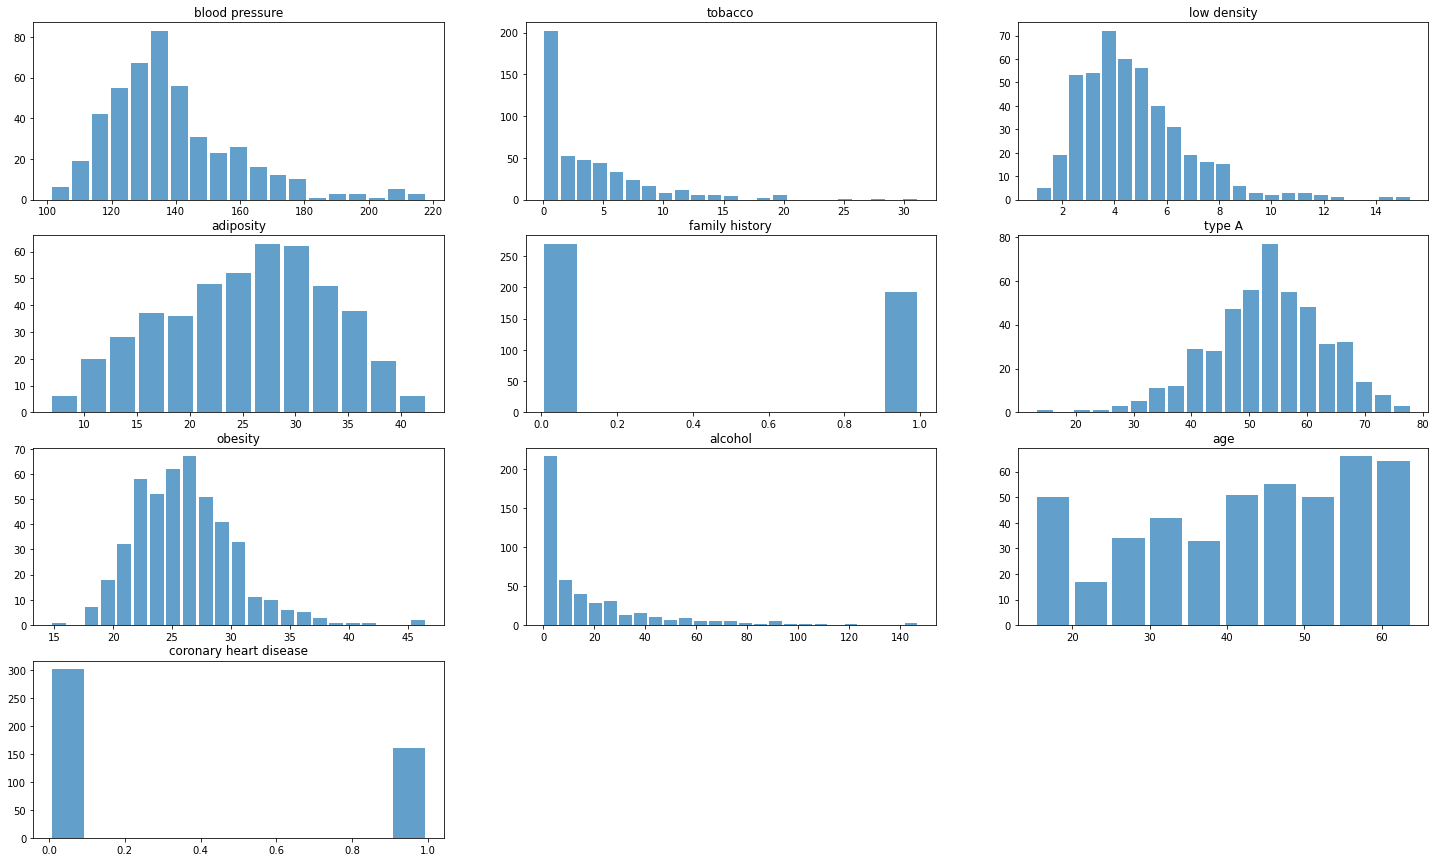

In [11]:
# Histograms
plt.figure(figsize=(25,15))

plt.subplot(4,3,1)
plt.hist(heart['sbp'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('blood pressure')

plt.subplot(4,3,2)
plt.hist(heart['tobacco'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('tobacco')

plt.subplot(4,3,3)
plt.hist(heart['ldl'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('low density')

plt.subplot(4,3,4)
plt.hist(heart['adiposity'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('adiposity')

plt.subplot(4,3,5)
plt.hist(heart['famhist'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('family history')

plt.subplot(4,3,6)
plt.hist(heart['typea'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('type A')

plt.subplot(4,3,7)
plt.hist(heart['obesity'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('obesity')

plt.subplot(4,3,8)
plt.hist(heart['alcohol'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('alcohol')

plt.subplot(4,3,9)
plt.hist(heart['age'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('age')

plt.subplot(4,3,10)
plt.hist(heart['chd'],alpha=0.7, rwidth=0.85,bins='auto')
plt.title('coronary heart disease')

plt.show() #display all figures


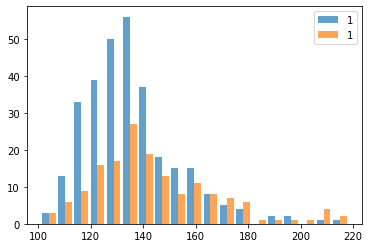

In [12]:
plt.hist(heart.pivot(columns='chd', values='sbp'),alpha=0.7, rwidth=0.85,bins='auto',label=heart['chd'])
plt.legend() #Place a legend on the Axes
plt.show()

In [13]:
X = heart.drop('chd',1)
y = heart['chd']
X.head()

/var/folders/qm/8v2xsbws7csbw9bfqpf33lk00000gn/T/ipykernel_46525/406739711.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = heart.drop('chd',1)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [14]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

### Scaling the data

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_scaled = pd.DataFrame(X_scaled,columns=('sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age'))
X_scaled.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760


### Divide data into train test categories

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)


### Models

In [18]:
# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# Decision Tree Model
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train,y_train)

# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=2,random_state=0)
random_forest.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, random_state=0)

### Making Predictions

In [19]:
# Logistic Predictions
y_pred_logistic = log_model.predict(X_test)

# Decision Model prediction
y_pred_decision = decision_model.predict(X_test)

# Random Forest prediction
y_pred_random = random_forest.predict(X_test)

### Accuracy Measures of each Model

In [20]:
print(f'Logistic Model Accuracy: {round(accuracy_score(y_test,y_pred_logistic)*100,2)}%')
print(f'Decision Tree Model Accuracy: {round(accuracy_score(y_test,y_pred_decision)*100,2)}%')
print(f'Random Forest Model Accuracy: {round(accuracy_score(y_test,y_pred_random)*100,2)}%')

Logistic Model Accuracy: 73.38%
Decision Tree Model Accuracy: 58.27%
Random Forest Model Accuracy: 68.35%


### Logistic Regression Cross Validation

In [21]:
from sklearn.linear_model import LogisticRegressionCV

In [22]:
log_modelCV = LogisticRegressionCV(cv=10,random_state=0)
log_modelCV.fit(X_train,y_train)

# Make Predictions
y_pred_logCV = log_modelCV.predict(X_test)

# Print model accuracy
print(f'Logistic CV model accuracy: {round(accuracy_score(y_test,y_pred_logCV)*100,2)}%')

Logistic CV model accuracy: 71.94%


In [23]:
log_modelCV = LogisticRegressionCV(cv=10,random_state=0)
log_modelCV.fit(X_train,y_train)
log_modelCV.predict(X_test)
print(f'LogisticCV score is {round(log_modelCV.score(X_test,y_test)*100,2)}%')


LogisticCV score is 71.94%


### Feature Importance

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# SelectKBest
selector = SelectKBest(k=6)
selector.fit(X_train, y_train)
selector_support = selector.get_support()

# RFE
clf = RandomForestClassifier()
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe_support = rfe.get_support()

# Get most important features of logistic regression
important_features = X_train.columns[selector_support & rfe_support]
print(important_features)

Index(['tobacco', 'ldl', 'adiposity', 'age'], dtype='object')


In [25]:
# RFE
logistic = LogisticRegression()
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe_support = rfe.get_support()

# Get most important features of logistic regression
important_features = X_train.columns[selector_support & rfe_support]
print(important_features)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'age'], dtype='object')


### P-values

In [26]:
import statsmodels.api as sm
# Logistic regression model
logit = sm.Logit(y_train,X_train)
# Fit the model
logitmodel = logit.fit()

Optimization terminated successfully.
         Current function value: 0.579752
         Iterations 5


In [27]:
# Print the summary
print(logitmodel.summary())

                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  323
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                 0.09896
Time:                        17:04:00   Log-Likelihood:                -187.26
converged:                       True   LL-Null:                       -207.83
Covariance Type:            nonrobust   LLR p-value:                 1.967e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sbp            0.2188      0.141      1.547      0.122      -0.058       0.496
tobacco        0.3264      0.158      2.060      0.039       0.016       0.637
ldl            0.4129      0.151      2.736      0.0

In [28]:
# Tune the model parameters
clf_logit = LogisticRegression(solver='lbfgs', C=0.2)

# Train the model
clf_logit.fit(X_train,y_train)
# Make predictions on the test set
y_pred = clf_logit.predict(X_test)

# Evaluate the model
#conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7194244604316546
